<a href="https://colab.research.google.com/github/abdulmoizniazi/Exploratory_Data_Analysis/blob/main/FIRST_CNN_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow
tensorflow.__version__

'2.17.1'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.datasets import mnist

(x_train, y_train) , (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


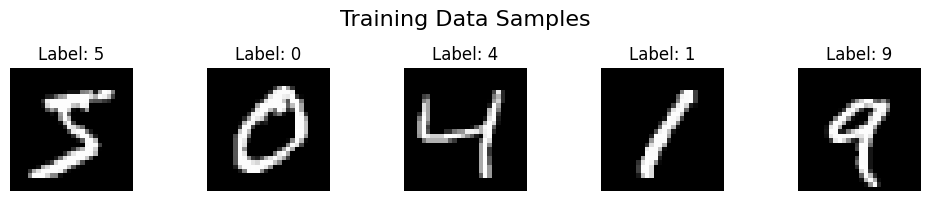

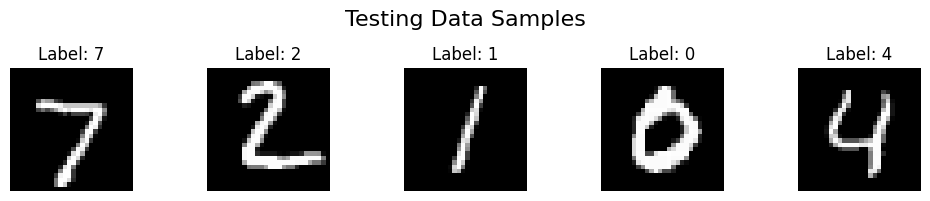

In [ ]:


# Function to display samples
def display_samples(images, labels, title, num_samples=5):
    """
    Display `num_samples` images with their labels.
    """
    plt.figure(figsize=(10, 2))  # Set figure size
    plt.suptitle(title, fontsize=16)  # Add title for the group

    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)  # Arrange plots in a row
        plt.imshow(images[i], cmap='gray')  # Display the image in grayscale
        plt.title(f"Label: {labels[i]}")  # Add the label as the title
        plt.axis('off')  # Hide axis

    plt.tight_layout()
    plt.show()


# Display 5 samples from the training dataset
display_samples(x_train, y_train, "Training Data Samples", num_samples=5)

# Display 5 samples from the testing dataset
display_samples(x_test, y_test, "Testing Data Samples", num_samples=5)


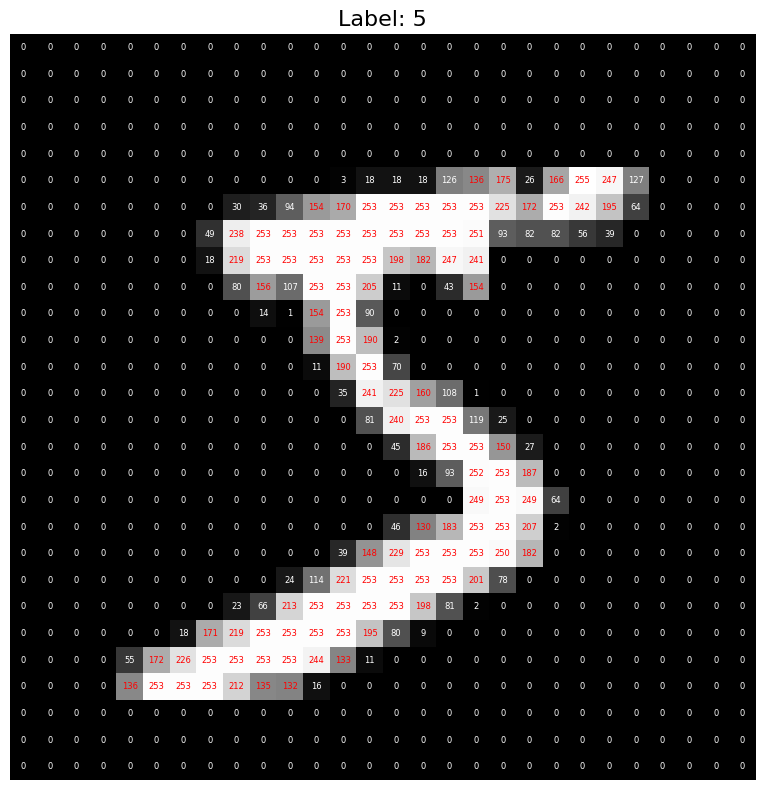

In [ ]:


# Choose a specific training image (e.g., the first image)
image_index = 0  # You can change this index to view different images
selected_image = x_train[image_index]
selected_label = y_train[image_index]

# Display the image with pixel values overlaid
plt.figure(figsize=(8, 8))
plt.imshow(selected_image, cmap='gray')  # Display the image in grayscale
plt.title(f"Label: {selected_label}", fontsize=16)
plt.axis('off')

# Overlay pixel values on the image
height, width = selected_image.shape
for i in range(height):
    for j in range(width):
        pixel_value = selected_image[i, j]
        # Display the pixel value as text (with color depending on intensity)
        plt.text(
            j, i,  # (x, y) coordinates
            str(pixel_value),  # Text to display
            color="red" if pixel_value > 128 else "white",  # Red for bright pixels
            fontsize=6, ha='center', va='center'  # Center text within each pixel
        )

plt.tight_layout()
plt.show()


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_test.shape

(10000,)

In [ ]:
x_train[2]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  67, 232,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  62,  81,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 120, 180,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 126, 163,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   2, 153, 210,  40,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 220, 163,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,  27, 254, 162,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 222, 163,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0, 183, 254, 125,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,  46, 245, 163,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0, 198, 254,  56,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 120, 254, 163,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,  23, 231, 254,  29,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 159, 254, 120,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 163, 254, 216,  16,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 159, 254,  67,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  14,  86, 178, 248, 254,  91,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 159, 254,  85,   0,   0,   0,  47,  49, 116, 144,
        150, 241, 243, 234, 179, 241, 252,  40,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 150, 253, 237, 207, 207, 207, 253, 254, 250, 240,
        198, 143,  91,  28,   5, 233, 250,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 119, 177, 177, 177, 177, 177,  98,  56,   0,
          0,   0,   0,   0, 102, 254, 220,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 254, 137,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 254,  57,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 254,  57,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 255,  94,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 254,  96,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 254, 153,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 255, 153,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

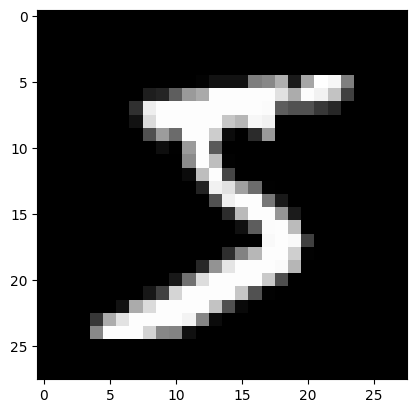

In [ ]:
plt.imshow(x_train[0], cmap='gray')  # Display the array as a grayscale image
plt.show()  # Display the figure

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# we will be using functional api

def CNN_builder():
    inputs= keras.Input(shape=(28,28,1), name='Input layer')
    x = layers.Conv2D(filters= 32, kernel_size = 3, strides = (1,1) , padding='valid',  activation='relu' ,name="conv_layer_1")(inputs)
    x = layers.MaxPool2D(pool_size=2, name="pooling_1")(x)
    x = layers.Conv2D(filters= 64, kernel_size = 3, activation='relu', name="conv_layer_2")(x)
    x = layers.MaxPool2D(pool_size=2, name="pooling_2")(x)
    x = layers.Conv2D(filters= 128, kernel_size = 3, activation='relu', name="conv_layer_3")(x)
    x = layers.Flatten(name="flattening_layer")(x)
    x = layers.Dense(units= 64, activation='relu')(x)
    outputs = layers.Dense(units= 10, activation='softmax', name='output_layer')(x)

    model = keras.Model(inputs= inputs , outputs=outputs, name='my_first_CNN_model')

    model.compile(optimizer='rmsprop',
                  loss='sparse_categorical_crossentropy', # Multi-class classification (orders, no one-hot encoding)
                  metrics=['accuracy'])

    return model

In [ ]:
model = CNN_builder()
model.summary()

Model: "my_first_CNN_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Input layer (InputLayer)             │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_layer_1 (Conv2D)                │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pooling_1 (MaxPooling2D)             │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_layer_2 (Conv2D)                │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pooling_2 (MaxPooling2D)             │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_layer_3 (Conv2D)                │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flattening_layer (Flatten)           │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 167,114 (652.79 KB)

 Trainable params: 167,114 (652.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import  ModelCheckpoint
modelcheckpoint  = ModelCheckpoint(filepath="first_CNN.keras",save_best_only=True, monitor="val_loss")


In [ ]:
history = model.fit(x=x_train, y=y_train,
          validation_data=(x_test, y_test),
          epochs=10, batch_size=64, callbacks=[modelcheckpoint])

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 52s 54ms/step - accuracy: 0.8715 - loss: 1.2759 - val_accuracy: 0.9758 - val_loss: 0.0806
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 84s 56ms/step - accuracy: 0.9821 - loss: 0.0604 - val_accuracy: 0.9826 - val_loss: 0.0684
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 57ms/step - accuracy: 0.9878 - loss: 0.0443 - val_accuracy: 0.9859 - val_loss: 0.0560
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 56ms/step - accuracy: 0.9910 - loss: 0.0319 - val_accuracy: 0.9875 - val_loss: 0.0608
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 49s 52ms/step - accuracy: 0.9929 - loss: 0.0254 - val_accuracy: 0.9838 - val_loss: 0.0794
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 50s 53ms/step - accuracy: 0.9950 - loss: 0.0206 - val_accuracy: 0.9827 - val_loss: 0.0918
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 52ms/step - accuracy: 0.9946 - loss: 0.0210 - val_accuracy: 0.9883 - val_loss: 0.0732
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 52ms/step - accuracy: 0.9950 - loss: 0.0207 - 

LOADING PRE-TRAINED MODEL

In [ ]:
test_model = keras.models.load_model("first_CNN.keras")
test_model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9816 - loss: 0.0718


[0.055975306779146194, 0.9858999848365784]

TESTING THE MODEL

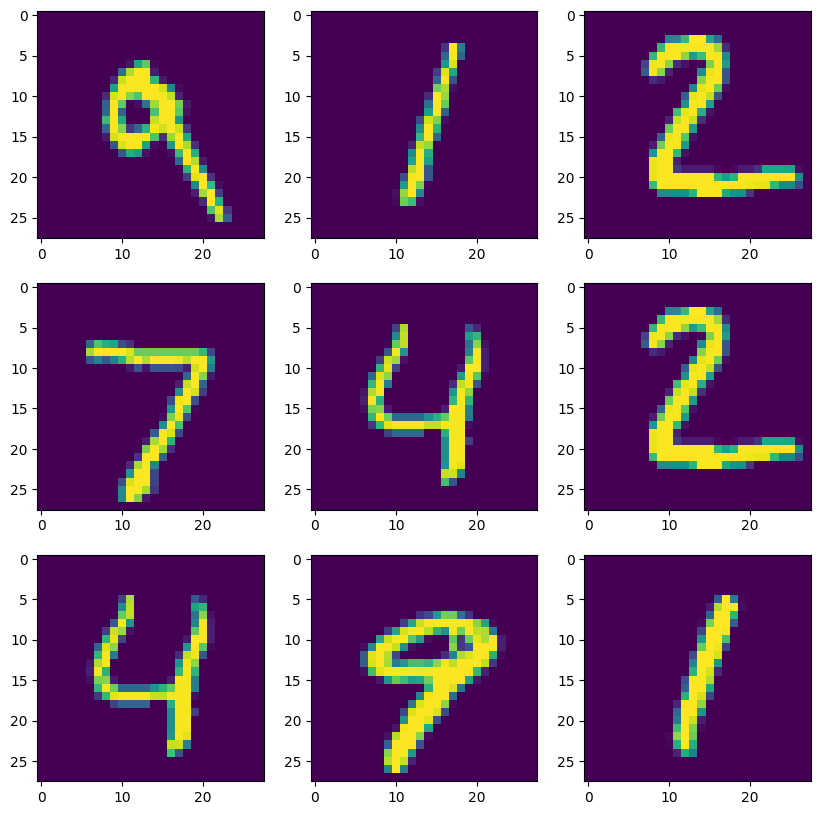

In [ ]:
plt.figure(figsize=(10,10))

actuals = []
for i , number in enumerate(y_test[:9]):
  ax = plt.subplot(3,3,i+1)
  plt.imshow(x_test[number].reshape(28,28))
  actuals.append(y_test[number])
plt.show()

In [ ]:
actuals

[9, 1, 2, 7, 4, 2, 4, 9, 1]

In [ ]:
import numpy as np

In [ ]:
predictions_prob = model.predict(x_test)
predictions_prob[0]


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


array([6.2915096e-26, 1.2568970e-21, 3.3628164e-17, 2.3580327e-27,
       1.6440192e-20, 2.4867839e-25, 1.4224099e-29, 9.9999994e-01,
       5.0946228e-29, 7.9854130e-17], dtype=float32)

In [ ]:
predictions = np.argmax(predictions_prob, axis=1)
predictions[0:5]

array([7, 2, 1, 0, 4])

In [ ]:
predictions[y_test[:9]]

array([9, 1, 2, 7, 4, 2, 4, 9, 1])

NOW CHECKING THE WRONG PREDICTIONS

In [ ]:
y_test!=predictions

array([False, False, False, ..., False, False, False])

In [ ]:
misclassified_images = [i for i, x in enumerate(y_test!=predictions) if x==True]
misclassified_images[:9]

[199, 247, 259, 320, 321, 336, 445, 447, 449]

In [ ]:
for a, b in enumerate(misclassified_images[:9]):
  print (a, b)

0 199
1 247
2 259
3 320
4 321
5 336
6 445
7 447
8 449


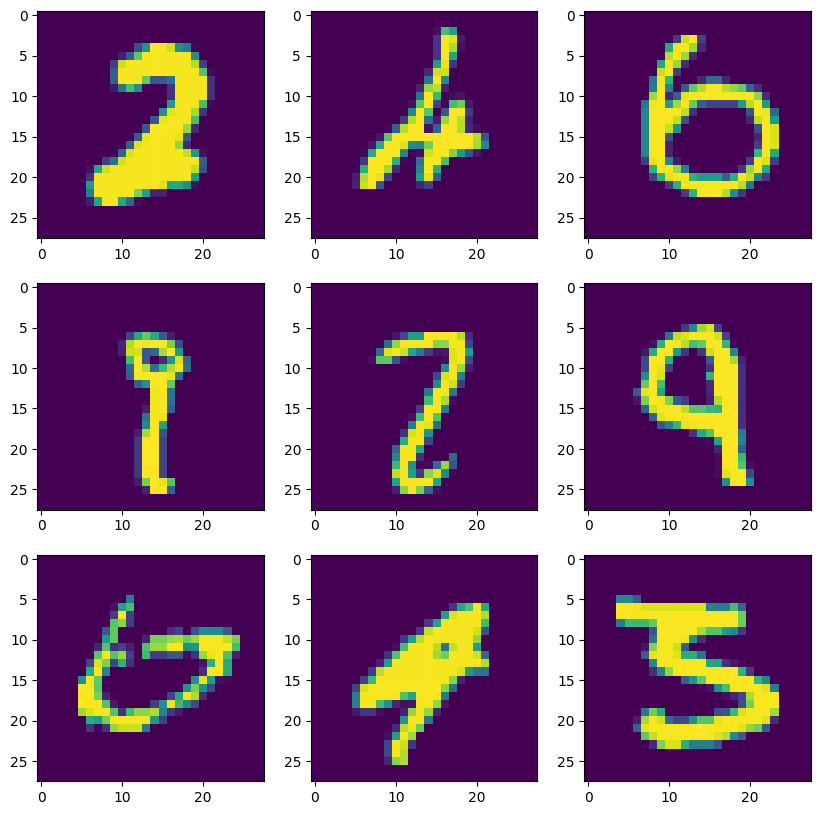

In [ ]:
plt.figure(figsize=(10,10))

actuals = []
for i , number in enumerate(misclassified_images[:9]):
  ax = plt.subplot(3,3,i+1)
  plt.imshow(x_test[number].reshape(28,28))
  actuals.append(y_test[number])
plt.show()

In [ ]:
actuals

[2, 4, 6, 9, 2, 9, 6, 4, 3]

In [ ]:
predictions[misclassified_images[:9]]

array([3, 2, 0, 8, 7, 4, 0, 9, 5])